# EDA

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [84]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [85]:
train.replace('?', np.nan, inplace = True)
test.replace('?', np.nan, inplace = True)

In [86]:
train.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,bind_incident_days,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,auto_incident_years,fraud_reported,_c39
count,700.000000,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000,700.00000,700.000000,...,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,0.0
mean,205.894286,39.105714,549242.077143,1147.857143,1245.976271,1.100000e+06,501432.612857,25804.857143,-26228.00000,4688.818571,...,0.994286,1.477143,52475.685714,7463.257143,7324.142857,37688.285714,2004.931429,10.068571,0.258571,NaN
std,116.018709,9.166258,258480.463210,611.579706,248.310901,2.282922e+06,72210.251502,28043.400441,28422.99164,2668.230881,...,0.818227,1.113472,26115.219702,4890.609140,4778.111003,18695.686555,5.983371,5.983371,0.438163,NaN
min,0.000000,20.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.00000,-20.000000,...,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,0.000000,0.000000,NaN
25%,114.000000,32.000000,343282.750000,500.000000,1077.460000,0.000000e+00,447978.250000,0.000000,-51275.00000,2471.000000,...,0.000000,0.000000,41662.500000,4265.000000,4420.000000,29872.500000,2000.000000,5.000000,0.000000,NaN
50%,202.000000,38.000000,536799.000000,1000.000000,1252.280000,0.000000e+00,466242.000000,11550.000000,-15650.00000,4658.500000,...,1.000000,1.000000,57710.000000,6820.000000,6685.000000,41760.000000,2005.000000,10.000000,0.000000,NaN
75%,279.000000,45.000000,757918.000000,2000.000000,1402.757500,0.000000e+00,603946.000000,51400.000000,0.00000,7005.750000,...,2.000000,2.000000,70072.500000,11235.000000,10825.000000,50417.500000,2010.000000,15.000000,1.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.00000,9172.000000,...,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000,20.000000,1.000000,NaN


In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           700 non-null    int64  
 1   age                          700 non-null    int64  
 2   policy_number                700 non-null    int64  
 3   policy_bind_date             700 non-null    object 
 4   policy_state                 700 non-null    object 
 5   policy_csl                   700 non-null    object 
 6   policy_deductable            700 non-null    int64  
 7   policy_annual_premium        700 non-null    float64
 8   umbrella_limit               700 non-null    int64  
 9   insured_zip                  700 non-null    int64  
 10  insured_sex                  700 non-null    object 
 11  insured_education_level      700 non-null    object 
 12  insured_occupation           700 non-null    object 
 13  insured_hobbies     

# Preprocessing

In [88]:
# missing values
train.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
bind_incident_days               0
incident_type                    0
collision_type                 123
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage     

In [89]:
# import missingno as msno

# msno.bar(train)
# plt.show()

In [90]:
# fill in missing values with mode
train['collision_type'] = train['collision_type'].fillna(train['collision_type'].mode()[0])
test['collision_type'] = test['collision_type'].fillna(train['collision_type'].mode()[0])
train['property_damage'] = train['property_damage'].fillna(train['property_damage'].mode()[0])
test['property_damage'] = test['property_damage'].fillna(train['property_damage'].mode()[0])
train['police_report_available'] = train['police_report_available'].fillna(train['police_report_available'].mode()[0])
test['police_report_available'] = test['police_report_available'].fillna(train['police_report_available'].mode()[0])

In [91]:
train.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
bind_incident_days               0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage     

In [92]:
test.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
bind_incident_days               0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage     

In [93]:
train.nunique()

months_as_customer             336
age                             45
policy_number                  700
policy_bind_date               673
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          694
umbrella_limit                  11
insured_zip                    699
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  270
capital-loss                   276
incident_date                   60
bind_incident_days             674
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_location              700
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage     

In [94]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state', 'insured_zip','incident_location','incident_date',
           'incident_state','incident_city','auto_make','auto_year', '_c39', 'bind_incident_days']

train.drop(to_drop, inplace = True, axis = 1)
test.drop(to_drop, inplace = True, axis = 1)

In [95]:
train.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_model,auto_incident_years,fraud_reported
0,187,37,500/1000,1000,1412.06,5000000,FEMALE,Masters,protective-serv,reading,...,0,3,NO,57700,5770,5770,46160,Maxima,15,0
1,243,44,250/500,500,809.11,0,MALE,JD,craft-repair,polo,...,2,1,YES,51400,5140,10280,35980,Civic,19,0
2,24,33,500/1000,1000,1922.84,0,FEMALE,High School,machine-op-inspct,skydiving,...,2,1,NO,46800,4680,9360,32760,Wrangler,13,0
3,215,42,500/1000,500,1848.81,0,MALE,JD,transport-moving,video-games,...,2,2,YES,68520,11420,5710,51390,Legacy,12,1
4,85,30,100/300,1000,796.35,0,FEMALE,MD,craft-repair,video-games,...,2,1,YES,58960,5360,10720,42880,F150,11,0


In [96]:
# heatmap

# plt.figure(figsize = (18, 12))

# corr = train.corr()

# sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
# plt.show()

In [97]:
# multicollinearity

# plt.figure(figsize = (18, 12))

# corr = train.corr()
# mask = np.triu(np.ones_like(corr, dtype = bool))

# sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
# plt.show()

In [98]:
train.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)
test.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           700 non-null    int64  
 1   policy_csl                   700 non-null    object 
 2   policy_deductable            700 non-null    int64  
 3   policy_annual_premium        700 non-null    float64
 4   umbrella_limit               700 non-null    int64  
 5   insured_sex                  700 non-null    object 
 6   insured_education_level      700 non-null    object 
 7   insured_occupation           700 non-null    object 
 8   insured_hobbies              700 non-null    object 
 9   insured_relationship         700 non-null    object 
 10  capital-gains                700 non-null    int64  
 11  capital-loss                 700 non-null    int64  
 12  incident_type                700 non-null    object 
 13  collision_type      

In [100]:
X_train = train.drop('fraud_reported', axis = 1)
y_train = train['fraud_reported']
X_test = test

### Encoding Categorical Variables

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_attribs = X_train.columns[ X_train.dtypes == 'object' ]

num_attribs = X_train.drop(cat_attribs, axis=1).columns

full_pipeline = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

full_pipeline.fit(X_train.append(X_test))
X_train_prep = full_pipeline.transform(X_train)
X_test_prep = full_pipeline.transform(X_test)

# X_train_prep = np.array(X_train)
# X_test_prep = np.array(X_test)

# Model Training

In [28]:
# SVC
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.svm import SVC

kfolder = KFold(n_splits=5, shuffle=True, random_state=2019)
oof_svc = np.zeros(len(X_train))
predictions_svc = np.zeros(len(X_test))
kfold = kfolder.split(X_train_prep, y_train)
fold_= 0

for train_index, vali_index in kfold:
    print("fold n°{}".format(fold_+1))
    fold_=fold_+1
    
    k_x_train = X_train_prep[train_index]
    k_y_train = y_train[train_index]
    
    sm = BorderlineSMOTE(sampling_strategy=0.79, random_state=42, k_neighbors=3)
    k_x_train, k_y_train = sm.fit_resample(k_x_train, k_y_train)
    
    k_x_vali = X_train_prep[vali_index]
    k_y_vali = y_train[vali_index]
    
    model_svc = SVC()
    #train the model
    model_svc.fit(k_x_train, k_y_train)
    oof_svc[vali_index] = model_svc.predict(k_x_vali)
    predictions_svc += model_svc.predict(X_test_prep)

print("auc score: {:<8.8f}".format(roc_auc_score(oof_svc, y_train)))
print("accuracy score: {:<8.8f}".format(accuracy_score(oof_svc, y_train)))
print("precision score: {:<8.8f}".format(precision_score(oof_svc, y_train)))
print("recall score: {:<8.8f}".format(recall_score(oof_svc, y_train)))
predictions_svc[predictions_svc <= 2] = 0
predictions_svc[predictions_svc >= 3] = 1

fold n°1
fold n°2
fold n°3
fold n°4
fold n°5
auc score: 0.71096614
accuracy score: 0.78000000
precision score: 0.47513812
recall score: 0.59310345


In [29]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold, RepeatedKFold

kfolder = KFold(n_splits=5, shuffle=True, random_state=2019)
oof_tree = np.zeros(len(X_train))
predictions_tree = np.zeros(len(X_test))
kfold = kfolder.split(X_train_prep, y_train)
fold_= 0

for train_index, vali_index in kfold:
    print("fold n°{}".format(fold_+1))
    fold_=fold_+1
    
    k_x_train = X_train_prep[train_index]
    k_y_train = y_train[train_index]
    
    sm = SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=3)
    k_x_train, k_y_train = sm.fit_resample(k_x_train, k_y_train)
    
    k_x_vali = X_train_prep[vali_index]
    k_y_vali = y_train[vali_index]
    
    model_tree = DecisionTreeClassifier(random_state=42)
    #train the model
    model_tree.fit(k_x_train, k_y_train)
    oof_tree[vali_index] = model_tree.predict(k_x_vali)
    predictions_tree += model_tree.predict(X_test_prep)

print("auc score: {:<8.8f}".format(roc_auc_score(oof_tree, y_train)))
print("accuracy score: {:<8.8f}".format(accuracy_score(oof_tree, y_train)))
print("precision score: {:<8.8f}".format(precision_score(oof_tree, y_train)))
print("recall score: {:<8.8f}".format(recall_score(oof_tree, y_train)))
predictions_tree[predictions_tree <= 2] = 0
predictions_tree[predictions_tree >= 3] = 1

fold n°1
fold n°2
fold n°3
fold n°4
fold n°5
auc score: 0.72538016
accuracy score: 0.78571429
precision score: 0.66850829
recall score: 0.57345972


In [30]:
# RF
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

kfolder = KFold(n_splits=5, shuffle=True, random_state=2019)
oof_rf = np.zeros(len(X_train))
predictions_rf = np.zeros(len(X_test))
kfold = kfolder.split(X_train_prep, y_train)
fold_= 0

for train_index, vali_index in kfold:
    print("fold n°{}".format(fold_+1))
    fold_=fold_+1
    
    k_x_train = X_train_prep[train_index]
    k_y_train = y_train[train_index]
    
    sm = SVMSMOTE(sampling_strategy=0.7, random_state=42, k_neighbors=3)
    k_x_train, k_y_train = sm.fit_resample(k_x_train, k_y_train)
    
    k_x_vali = X_train_prep[vali_index]
    k_y_vali = y_train[vali_index]
    
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    #train the model
    model_rf.fit(k_x_train, k_y_train)
    oof_rf[vali_index] = model_rf.predict(k_x_vali)
    predictions_rf += model_rf.predict(X_test_prep)

print("auc score: {:<8.8f}".format(roc_auc_score(oof_rf, y_train)))
print("accuracy score: {:<8.8f}".format(accuracy_score(oof_rf, y_train)))
print("precision score: {:<8.8f}".format(precision_score(oof_rf, y_train)))
print("recall score: {:<8.8f}".format(recall_score(oof_rf, y_train)))
predictions_rf[predictions_rf <= 2] = 0
predictions_rf[predictions_rf >= 3] = 1

fold n°1
fold n°2
fold n°3
fold n°4
fold n°5
auc score: 0.74732381
accuracy score: 0.80571429
precision score: 0.57458564
recall score: 0.63803681


In [31]:
# xgb
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold, RepeatedKFold
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE, SVMSMOTE

xgb_params = {'eta': 0.005, 
              'max_depth': 10, 
              'subsample': 0.8, 
              'colsample_bytree': 0.8, 
              'objective': 'binary:hinge', 
              'eval_metric': 'auc',  # ["auc","rmse","logloss"]
              'silent': True, 
              'nthread': 4}
folds = KFold(n_splits=5, shuffle=True, random_state=42)
oof_xgb = np.zeros(len(train))
predictions_xgb = np.zeros(len(test))
 
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
    
    sm = ADASYN(sampling_strategy=0.6, random_state=42, n_neighbors=3)
    X_train_prep_new, y_train_new = sm.fit_resample(X_train_prep[trn_idx], y_train[trn_idx])
    
    trn_data = xgb.DMatrix(X_train_prep_new, y_train_new)
#     trn_data = xgb.DMatrix(X_train_prep[trn_idx], y_train[trn_idx]) 
    val_data = xgb.DMatrix(X_train_prep[val_idx], y_train[val_idx]) 
 
    watchlist = [(trn_data, 'train'), (val_data, 'valid_data')]
    clf = xgb.train(dtrain=trn_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=100,
                    params=xgb_params)
    oof_xgb[val_idx] = clf.predict(xgb.DMatrix(X_train_prep[val_idx]), ntree_limit=clf.best_ntree_limit)
    predictions_xgb += clf.predict(xgb.DMatrix(X_test_prep), ntree_limit=clf.best_ntree_limit)

print("auc score: {:<8.8f}".format(roc_auc_score(oof_xgb, y_train)))
print("accuracy score: {:<8.8f}".format(accuracy_score(oof_xgb, y_train)))
print("precision score: {:<8.8f}".format(precision_score(oof_xgb, y_train)))
print("recall score: {:<8.8f}".format(recall_score(oof_xgb, y_train)))
predictions_xgb[predictions_xgb <= 2] = 0
predictions_xgb[predictions_xgb >= 3] = 1

fold n°1
[22:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.50000	valid_data-auc:0.50000
[100]	train-auc:0.50000	valid_data-auc:0.50000
[200]	train-auc:0.94852	valid_data-auc:0.82857
[300]	train-auc:0.97941	valid_data-auc:0.81429
[379]	train-auc:0.98256	valid_data-auc:0.80952
fold n°2
[22:39:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but 

In [32]:
# lgbm
import lightgbm as lgb
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE, SVMSMOTE

param = {'boosting_type': 'gbdt',
         'num_leaves': 20,
         'min_data_in_leaf': 20, 
         'objective':'regression',
         'max_depth':5,
         'learning_rate': 0.01,
         "min_child_samples": 30,

         "feature_fraction": 0.8,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 11,
         "metric": 'mse',
         "lambda_l1": 0.1,
         "verbosity": -1}

folds = KFold(n_splits=5, shuffle=True, random_state=2018)
oof_lgb = np.zeros(len(X_train))
predictions_lgb = np.zeros(len(test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train_prep, y_train)):
    print("fold n°{}".format(fold_+1))

    sm = ADASYN(sampling_strategy=0.85, random_state=42, n_neighbors=4)
    X_train_prep_new, y_train_new = sm.fit_resample(X_train_prep[trn_idx], y_train[trn_idx])
    trn_data = lgb.Dataset(X_train_prep_new, y_train_new)
#     trn_data = lgb.Dataset(X_train_prep[trn_idx], y_train[trn_idx])
    val_data = lgb.Dataset(X_train_prep[val_idx], y_train[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=200,
                    early_stopping_rounds = 100)
    oof_lgb[val_idx] = clf.predict(X_train_prep[val_idx], num_iteration=clf.best_iteration)
    predictions_lgb += clf.predict(X_test_prep, num_iteration=clf.best_iteration) / folds.n_splits

oof_lgb[oof_lgb <= 0.5] = 0
oof_lgb[oof_lgb > 0.5] = 1
predictions_lgb[predictions_lgb <= 0.5] = 0
predictions_lgb[predictions_lgb > 0.5] = 1
print("auc score: {:<8.8f}".format(roc_auc_score(oof_lgb, y_train)))
print("accuracy score: {:<8.8f}".format(accuracy_score(oof_lgb, y_train)))
print("precision score: {:<8.8f}".format(precision_score(oof_lgb, y_train)))
print("recall score: {:<8.8f}".format(recall_score(oof_lgb, y_train)))

fold n°1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
Training until validation scores don't improve for 100 rounds
[200]	training's l2: 0.0712049	valid_1's l2: 0.113608
[400]	training's l2: 0.0508659	valid_1's l2: 0.111928
Early stopping, best iteration is:
[304]	training's l2: 0.0580188	valid_1's l2: 0.111246
fold n°2
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
Training until validation scores don't improve for 100 rounds
[200]	training's l2: 0.0667945	valid_1's l2: 0.141835
Early stopping, best iteration is:
[190]	training's l2: 0.0688179	valid_1's l2: 0.141733
fold n°3
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
Training until validation scores don't improve for 100 rounds
[200]	training's l2: 0.0737803	valid_1's l2: 0.0973563
Early stopping, best itera

In [33]:
# catboost
from catboost import Pool, CatBoostClassifier
# cat_features=[0,2,3,10,11,13,15,16,17,18,19]
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

kfolder = KFold(n_splits=5, shuffle=True, random_state=2019)
oof_cb = np.zeros(len(X_train))
predictions_cb = np.zeros(len(X_test))
kfold = kfolder.split(X_train_prep, y_train)
fold_= 0

for train_index, vali_index in kfold:
    print("fold n°{}".format(fold_+1))
    fold_=fold_+1
    
    k_x_train = X_train_prep[train_index]
    k_y_train = y_train[train_index]
    
    sm = BorderlineSMOTE(sampling_strategy=0.84, random_state=42, k_neighbors=2)
    k_x_train, k_y_train = sm.fit_resample(k_x_train, k_y_train)
    
    k_x_vali = X_train_prep[vali_index]
    k_y_vali = y_train[vali_index]
    cb_params = {
         'n_estimators': 100000,
         'loss_function': 'Logloss',
         'eval_metric':'Accuracy',
         'learning_rate': 0.05,
         'depth': 5,
         'use_best_model': True,
         'subsample': 0.6,
         'bootstrap_type': 'Bernoulli'
    }
    model_cb = CatBoostClassifier(**cb_params)
    #train the model
    model_cb.fit(k_x_train, k_y_train,eval_set=[(k_x_vali, k_y_vali)],verbose=100,early_stopping_rounds=50)
    oof_cb[vali_index] = model_cb.predict(k_x_vali, ntree_end=model_cb.best_iteration_)
    predictions_cb += model_cb.predict(X_test_prep, ntree_end=model_cb.best_iteration_)

predictions_cb[predictions_cb <= 2] = 0
predictions_cb[predictions_cb > 2] = 1
print("auc score: {:<8.8f}".format(roc_auc_score(oof_cb, y_train)))
print("accuracy score: {:<8.8f}".format(accuracy_score(oof_cb, y_train)))
print("precision score: {:<8.8f}".format(precision_score(oof_cb, y_train)))
print("recall score: {:<8.8f}".format(recall_score(oof_cb, y_train)))

fold n°1
0:	learn: 0.8442953	test: 0.8714286	best: 0.8714286 (0)	total: 2.88ms	remaining: 4m 47s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8714285714
bestIteration = 0

Shrink model to first 1 iterations.
fold n°2
0:	learn: 0.8782383	test: 0.8428571	best: 0.8428571 (0)	total: 2.34ms	remaining: 3m 53s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8428571429
bestIteration = 0

Shrink model to first 1 iterations.
fold n°3
0:	learn: 0.8465540	test: 0.8000000	best: 0.8000000 (0)	total: 2.55ms	remaining: 4m 15s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8
bestIteration = 0

Shrink model to first 1 iterations.
fold n°4
0:	learn: 0.8675325	test: 0.8785714	best: 0.8785714 (0)	total: 2.15ms	remaining: 3m 34s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8785714286
bestIteration = 0

Shrink model to first 1 iterations.
fold n°5
0:	learn: 0.8580815	test: 0.8285714	best: 0.8285714 (0)	total: 2.13ms	remain

In [34]:
# Stacking
from sklearn.naive_bayes import GaussianNB, BernoulliNB

train_stack = np.vstack([oof_cb,oof_lgb]).transpose()
test_stack = np.vstack([predictions_cb,predictions_lgb]).transpose()

folds_stack = RepeatedKFold(n_splits=5, n_repeats=2, random_state=2018)
oof_stack = np.zeros(train_stack.shape[0])
predictions1 = np.zeros(test_stack.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds_stack.split(train_stack,y_train)):
    print("fold {}".format(fold_))
    trn_data, trn_y = train_stack[trn_idx], y_train[trn_idx]
    val_data, val_y = train_stack[val_idx], y_train[val_idx]
    
    clf_3 = BernoulliNB()
    clf_3.fit(trn_data, trn_y)
    
    oof_stack[val_idx] = clf_3.predict(val_data)
    predictions1 += clf_3.predict(test_stack) / 10
    
print("CV score: {:<8.8f}".format(roc_auc_score(oof_stack, y_train)))

fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
CV score: 0.79149660


In [35]:
# stacking with more than two models
train_stack = np.vstack([oof_svc, oof_tree, oof_rf, oof_xgb, oof_lgb, oof_cb]).transpose()
test_stack = np.vstack([predictions_svc, predictions_tree, predictions_rf, predictions_xgb, predictions_lgb, predictions_cb]).transpose()

folds_stack = RepeatedKFold(n_splits=5, n_repeats=2, random_state=2018)
oof_stack = np.zeros(train_stack.shape[0])
predictions = np.zeros(test_stack.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds_stack.split(train_stack,y_train)):
    print("fold {}".format(fold_))
    trn_data, trn_y = train_stack[trn_idx], y_train.iloc[trn_idx].values
    val_data, val_y = train_stack[val_idx], y_train.iloc[val_idx].values
    
    clf_3 = BernoulliNB()
    clf_3.fit(trn_data, trn_y)
    
    oof_stack[val_idx] = clf_3.predict(val_data)
    predictions += clf_3.predict(test_stack) / 10
    
print("CV score: {:<8.8f}".format(roc_auc_score(oof_stack, y_train)))

fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
CV score: 0.79834759


In [125]:
res = pd.read_csv("sampleSubmission.csv")

In [132]:
res['fraud_reported'] = predictions_cb
res

,policy_number,fraud_reported
0,698589,0.0
1,287489,1.0
2,211578,0.0
3,807369,0.0
4,830878,0.0
...,...,...
295,679370,0.0
296,272330,0.0
297,315631,0.0
298,445195,0.0


In [134]:
res.to_csv("table_submission.csv", index=False)

In [136]:
test_with_y = pd.read_csv("test_with_y.csv")
y_test = test_with_y['fraud_reported']
y_test

0      0
1      1
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    0
299    0
Name: fraud_reported, Length: 300, dtype: int64

In [139]:
roc_auc_score(y_test, predictions_xgb)

0.7748640248640248

# Feature Importance - Based on RF

In [63]:
train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")
X_train = train.drop('fraud_reported', axis = 1)
y_train = train['fraud_reported']

cat_attribs = X_train.columns[ X_train.dtypes == 'object' ]

num_attribs = X_train.drop(cat_attribs, axis=1).columns

In [67]:
X_train = X_train.drop(cat_attribs, axis=1).drop('_c39', axis=1)
X_test = X_test.drop(cat_attribs, axis=1).drop('_c39', axis=1)

In [56]:
test_with_y = pd.read_csv('test_with_y.csv')
y_test = test_with_y['fraud_reported']

In [68]:
from sklearn import ensemble
from sklearn import metrics

RF_class = ensemble.RandomForestClassifier(n_estimators=200, random_state=42) # n_estimators：森林中决策树的数量，默认100
RF_class.fit(X_train, y_train)
RFclass_pred = RF_class.predict(X_test)
print('模型在测试集的预测准确率：\n', metrics.accuracy_score(y_test, RFclass_pred))

模型在测试集的预测准确率：
 0.78


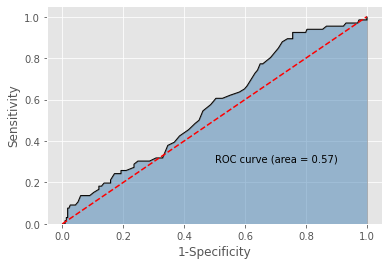

In [69]:
y_score = RF_class.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
# AUC
roc_auc = metrics.auc(fpr,tpr)

# ROC curve
plt.stackplot(fpr, tpr, color='steelblue', alpha=0.5, edgecolor='black')
plt.plot(fpr, tpr, color='black', lw=1)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.text(0.5, 0.3, 'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [70]:
# feature importance
importance = RF_class.feature_importances_
importance

array([0.06621478, 0.05711233, 0.07165931, 0.0182025 , 0.0733909 ,
       0.01621776, 0.07081713, 0.04229473, 0.03916492, 0.06504057,
       0.04619446, 0.01689255, 0.01583675, 0.02517209, 0.07343418,
       0.06849561, 0.07564571, 0.07605138, 0.03994079, 0.04222153])

In [72]:
# construct series to plot
Impt_Series = pd.Series(importance, index=X_train.columns)
Impt_Series

months_as_customer             0.066215
age                            0.057112
policy_number                  0.071659
policy_deductable              0.018203
policy_annual_premium          0.073391
umbrella_limit                 0.016218
insured_zip                    0.070817
capital-gains                  0.042295
capital-loss                   0.039165
bind_incident_days             0.065041
incident_hour_of_the_day       0.046194
number_of_vehicles_involved    0.016893
bodily_injuries                0.015837
witnesses                      0.025172
total_claim_amount             0.073434
injury_claim                   0.068496
property_claim                 0.075646
vehicle_claim                  0.076051
auto_year                      0.039941
auto_incident_years            0.042222
dtype: float64

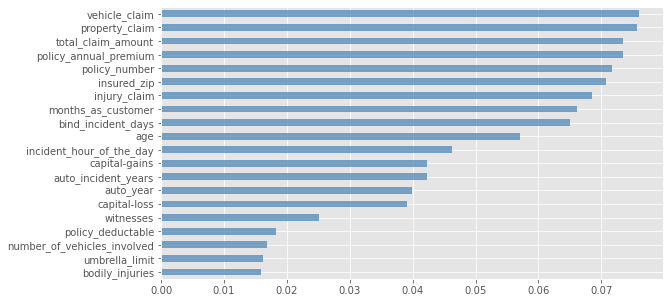

In [82]:
plt.figure(figsize=(9,5))
Impt_Series.sort_values(ascending=True).plot(kind='barh', color='steelblue', alpha=0.7)
plt.show()